# Introduction to Natural Language Processing: Assignment 3

In this exercise we'll practice features extraction using SpaCy as well as multiclass text classification using the word embedding technique.

- You can use built-in Python packages, spaCy, scikit-learn, Numpy and Pandas.
- Please comment your code
- Submissions are due Tuesdays at 23:59 **only** on eCampus: **Assignmnets >> Student Submissions >> Assignment 3 (Deadline: 05.12.2023, at 23:59)**

- Name the file aproppriately: "Assignment_3_\<Your_Name\>.ipynb" and submit only the Jupyter Notebook file.
- Please use relative path, your code should work on my computer if the Jupyter Notebook and the file are both in the same directory.

Example: file_name = bbc-news.csv, **DON'T use:** /Users/ComputerName/Username/Documents/.../bbc-news.csv

### Task 1 (2 points)

Write a function `extract_proper_nouns(my_file_name)` that takes a file name as input and returns a list containing all proper nouns with more than one token.

**Example:**

text = "Honk Kong and Japan are two countries in Asia and New York is the largest city in the world"

return = `["New York", "Hong Kong"]` **(Note: it should not return "Japan")**

In [1]:
import spacy

In [2]:
def extract_proper_nouns(my_file_name):
    # Load the spaCy English model
    nlp = spacy.load("en_core_web_sm")
    # Read the content of the file
    with open(my_file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    
    doc = nlp(text)
    # Extract proper nouns with more than one token
    several_token_propn = []
    current_proper_noun = ''
    
    for token in doc:
        if token.pos_ == 'PROPN':
            current_proper_noun += token.text + ' '
        else:
            if (len(current_proper_noun.strip().split()) > 1):  # Check if the current_proper_noun is not empty
                several_token_propn.append(current_proper_noun.strip())
            current_proper_noun = ''
                
    return several_token_propn

In [3]:
print(extract_proper_nouns("task1.txt"))

['Hong Kong', 'New York']


### Task 2 (4 points)

Write a function `common_lemma(my_file_name)` that takes a file name as input and returns a Python dictionary with lemmas as `key` and the `value` that should contain a list with both verbs and nouns sharing the same lemma.

**Examples:**

1.
text = "When users google for a word or any query, their system internally runs a pipeline in order to process what the person is querying."

return = `{"query": ["query", "querying"]}`

2.
text = I really loved the movie and show, the movie was showing reality but it showed sometimes nonesense!

return = `{"show": ["show", "showing", "showed"]}` **(Note: it should not return "movie" because both "movie"s are NOUN)**

In [4]:
def common_lemma(my_file_name):
    tokens_with_common_lemma = {}
    # here comes your code
    # Load the spaCy English model
    nlp = spacy.load("en_core_web_sm")
    # Read the content of the file
    with open(my_file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    
    doc = nlp(text)
    
    for token in doc:
        if (token.lemma_ not in tokens_with_common_lemma.keys()):    
            tokens_with_common_lemma[token.lemma_] = []
        
        if(token.pos_ in ['NOUN','VERB']):
            tokens_with_common_lemma[token.lemma_].append(token)
        
        
    return tokens_with_common_lemma

In [5]:
print(common_lemma("task2_1.txt"))

{'when': [], 'user': [users], 'google': [google], 'for': [], 'a': [], 'word': [word], 'or': [], 'any': [], 'query': [query, querying], ',': [], 'their': [], 'system': [system], 'internally': [], 'run': [runs], 'pipeline': [pipeline], 'in': [], 'order': [order], 'to': [], 'process': [process], 'what': [], 'the': [], 'person': [person], 'be': [], '.': []}


In [6]:
print(common_lemma("task2_2.txt"))

{'I': [], 'really': [], 'love': [loved], 'the': [], 'movie': [movie, movie], 'and': [], 'show': [show, showing, showed], ',': [], 'be': [], 'reality': [reality], 'but': [], 'it': [], 'sometimes': [], 'nonesense': [], '!': []}


### Task 3 (1 point)

a) Load the data `bbc-text.csv`; This datata consists of 2225 documents from the BBC news website corresponding to stories from 2004-2005.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
bbc_df = pd.read_csv("bbc-news.csv")

### Task 4 (1 point)

a) Show how many articles we have for each topical area (class label) in the dataset using a plot.

In [9]:
category_counts = bbc_df['category'].value_counts()

Text(0, 0.5, 'Count')

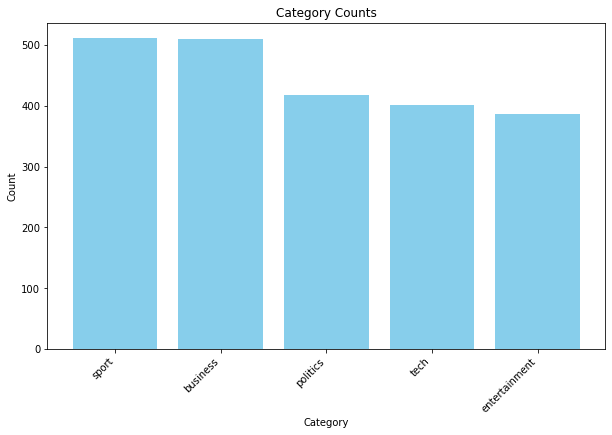

In [10]:
# Bar chart
plt.figure(figsize=(10, 6))
#category_counts.plot(kind='bar', color='skyblue')
categories = category_counts.index
counts = category_counts.values
plt.bar(categories, counts, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')

### Task 5 (2 point)

a) Preprocessing: Define two following functions and apply them to the dataset:
1. Remove punctuation
2. Remove any numbers

In [11]:
import string

In [12]:
def remove_punctuation(corpus):
    cleaned_corpus = corpus.copy()
    cleaned_corpus['text'] = cleaned_corpus['text'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))
    return(cleaned_corpus)

def remove_numbers(corpus):
    cleaned_corpus = corpus.copy()
    cleaned_corpus['text'] = cleaned_corpus['text'].apply(lambda x: ''.join(char for char in x if not char.isdigit()))
    return(cleaned_corpus)

In [13]:
cleaned1 = remove_punctuation(bbc_df)

In [14]:
bbc_df.loc[12, 'text']

'crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months.  freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low. fresh falls in the value of the dollar helped carry prices above the $50 mark for the first time since november. a barrel of us crude oil closed up $2.80 to $51.15 in new york on tuesday. opec members said on tuesday that it saw no reason to cut its output.  although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48.  brent crude also rose in london trading  adding $1.89 to $48.62 at the close. much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days. the decline in the us dollar to a five-week low against the euro has also served to inflate prices

In [15]:
cleaned1.loc[12, 'text']

'crude oil prices back above 50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above 50 a barrel for the first time in almost three months  freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low fresh falls in the value of the dollar helped carry prices above the 50 mark for the first time since november a barrel of us crude oil closed up 280 to 5115 in new york on tuesday opec members said on tuesday that it saw no reason to cut its output  although below last year s peak of 5567 a barrel  which was reached in october  prices are now well above 2004 s average of 4148  brent crude also rose in london trading  adding 189 to 4862 at the close much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days the decline in the us dollar to a fiveweek low against the euro has also served to inflate prices  the dollar moved sharp

In [16]:
cleaned2 = remove_numbers(bbc_df)

In [17]:
bbc_df.loc[12, 'text']

'crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months.  freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low. fresh falls in the value of the dollar helped carry prices above the $50 mark for the first time since november. a barrel of us crude oil closed up $2.80 to $51.15 in new york on tuesday. opec members said on tuesday that it saw no reason to cut its output.  although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48.  brent crude also rose in london trading  adding $1.89 to $48.62 at the close. much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days. the decline in the us dollar to a five-week low against the euro has also served to inflate prices

In [18]:
cleaned2.loc[12, 'text']

'crude oil prices back above $ cold weather across parts of the united states and much of europe has pushed us crude oil prices above $ a barrel for the first time in almost three months.  freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low. fresh falls in the value of the dollar helped carry prices above the $ mark for the first time since november. a barrel of us crude oil closed up $. to $. in new york on tuesday. opec members said on tuesday that it saw no reason to cut its output.  although below last year s peak of $. a barrel  which was reached in october  prices are now well above  s average of $..  brent crude also rose in london trading  adding $. to $. at the close. much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days. the decline in the us dollar to a five-week low against the euro has also served to inflate prices.  the dollar moved sharply over

### Task 6 (4 points)

a) Load the **large model trained on the web text** provided by spaCy. (`en_core_web_lg`)

b) Split the data into trainng and test set (70% and 30%) using scikit-learn, shuffle it, and set the `seed=101 (random_state)`.

c) Convert each article in your data splits to a vector representation using the pre-trained spaCy model. (**Hint:** It should be stored as an array)

**NOTE:** If working with this dataset is not computationaly possible for you, you can work only with a subset of the dataset (i.e., the first 1000 rows) and use only the first 150 tokens for each article. You should point this out in your code.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
nlp = spacy.load("en_core_web_sm")

In [21]:
text_train, text_test, category_train, category_test = train_test_split(bbc_df['text'], bbc_df['category'], train_size=0.7, random_state=101, shuffle=True)

### Before

In [22]:
text_train

920     oscar nominees lack pulling power this year s ...
1500    smartphones suffer skulls attack owners of som...
1711    souness backs smith for scotland graeme sounes...
1978    venezuela reviews foreign deals venezuela is t...
1125    parmalat founder offers apology the founder an...
                              ...                        
599     anti-spam screensaver scrapped a contentious c...
1599    britons fed up with net service a survey condu...
1361    executive trio leave aer lingus three senior e...
1547    j-lo and husband plan debut duet singers jenni...
863     online commons to spark debate online communit...
Name: text, Length: 1557, dtype: object

In [23]:
text_test

2148    standard life concern at lse bid standard life...
2018    uk plan to deport terror suspects deals are be...
37      row threatens hendrix museum plan proposals to...
1150    intel unveils laser breakthrough intel has sai...
1124    uk s  useless  quangos under fire the uk has 5...
                              ...                        
1030    blair defends terror law changes the prime min...
1006    winemaker rejects foster s offer australian wi...
1822    corbett attacks  dumbed-down tv  ronnie corbet...
1590    blair moves to woo jewish voters tony blair ha...
700     blunkett unveils policing plans people could b...
Name: text, Length: 668, dtype: object

### Conversion

In [24]:
# Our model needs to implement vector() method for token - Okay
# Each token has its vector representation defined by model - this is word/token embedding
# Embedding of a document (Doc) is nothing but average of all its token.vector values
text_train = text_train.apply(lambda text: nlp(text).vector)
text_test = text_test.apply(lambda text: nlp(text).vector)

# Should I convert category (i.e. single token) to vector representation as well? I think no, bcs makes no sense for labels

### After

In [25]:
# Now text_train and text_test are converted to vector representation with shape (n,)
text_train

920     [0.04587557, -0.18607014, -0.14123145, -0.1141...
1500    [0.12738177, -0.15365377, -0.038221546, 0.0435...
1711    [-0.0035640586, -0.31219652, -0.010393943, -0....
1978    [-0.17555508, -0.1870735, -0.10381903, 0.00155...
1125    [0.050612394, -0.12034214, -0.0944168, -0.0187...
                              ...                        
599     [0.10502731, -0.16653192, -0.015793895, 0.0329...
1599    [0.05984366, -0.18024504, -0.12330671, -0.0539...
1361    [0.00463871, -0.31176937, -0.06316884, -0.0593...
1547    [-0.032687232, -0.37886277, -0.11911188, -0.03...
863     [0.026408223, -0.30349988, -0.051335763, -0.02...
Name: text, Length: 1557, dtype: object

In [26]:
text_test

2148    [0.045642063, -0.32679072, 0.028273992, -0.032...
2018    [-0.0540397, -0.19143005, -0.05899064, -0.0235...
37      [-0.02930799, -0.31975922, -0.02101973, -0.056...
1150    [0.08730897, -0.1990134, -0.008594813, -0.0662...
1124    [0.029377855, -0.24993962, -0.11951273, -0.035...
                              ...                        
1030    [0.011091839, -0.2347611, -0.07268334, -0.0358...
1006    [-0.018439071, -0.23979437, -0.110605255, -0.0...
1822    [-0.06225937, -0.18013778, -0.101292856, -0.10...
1590    [-0.06393145, -0.29410613, -0.08078611, -0.049...
700     [0.016995754, -0.22626995, 0.0056678588, -0.06...
Name: text, Length: 668, dtype: object

### Note: For this specific model (eng_core_web_sm), word embedding is vector of length (96,)
### Note2: I did not run large model (eng_core_web_sm). But as I remember, word embedding for that model is vector of length (300,)

In [27]:
len(text_train.loc[920])

96

In [28]:
len(text_test.loc[2148])

96

### Task 7 (6 points)

a) Using the vectors from Task 2, train 3 different models provided by scikit-learn. (**Note:** One of the models must be `MLPClassifier`)

b) Evaluate the classifiers on the test set and report the accuracy and confusion matrix. (**Hint:** You should build a confusion matrix for multi-class classification)

In [29]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [31]:
classifier_1 = KNeighborsClassifier()
classifier_2 = SVC()
classifier_3 = RandomForestClassifier()
classifier_4 = MLPClassifier()

In [32]:
def calculate_accuracy(predicted_labels, gt_labels):
    correct_predictions = np.sum(predicted_labels == gt_labels)
    total_samples = len(gt_labels)
    accuracy = correct_predictions / total_samples
    return accuracy

In [33]:
# Encode categories to nfrom string to numbers
# shape: (num_examples,)
label_encoder = LabelEncoder()
label_encoder.fit(category_train)
category_train = label_encoder.transform(category_train)
category_test = label_encoder.transform(category_test)

In [43]:
category_train.shape

(1557,)

In [34]:
# Make input to shape (num_examples, num_features)
text_train = np.vstack(text_train.to_numpy())
text_test = np.vstack(text_test.to_numpy())

In [44]:
text_train.shape

(1557, 96)

In [35]:
classifier_1.fit(text_train, category_train);
predicted_label_test_1 = classifier_1.predict(text_test)
accuracy_1 = calculate_accuracy(predicted_label_test_1, category_test)

/home/faris/miniconda3/envs/nlp/lib/python3.8/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [36]:
classifier_2.fit(text_train, category_train);
predicted_label_test_2 = classifier_2.predict(text_test)
accuracy_2 = calculate_accuracy(predicted_label_test_2, category_test)

In [37]:
classifier_3.fit(text_train, category_train);
predicted_label_test_3 = classifier_3.predict(text_test)
accuracy_3 = calculate_accuracy(predicted_label_test_3, category_test)

In [38]:
classifier_4.fit(text_train, category_train);
predicted_label_test_4 = classifier_4.predict(text_test)
accuracy_4 = calculate_accuracy(predicted_label_test_4, category_test)

/home/faris/miniconda3/envs/nlp/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
print("Accuracy of the KNeighborsClassifier: " + str(accuracy_1))

Accuracy of the KNeighborsClassifier: 0.6901197604790419


In [40]:
print("Accuracy of the SVC: " + str(accuracy_2))

Accuracy of the SVC: 0.7514970059880239


In [41]:
print("Accuracy of the RandomForestClassifier: " + str(accuracy_3))

Accuracy of the RandomForestClassifier: 0.7125748502994012


In [42]:
print("Accuracy of the MLPClassifier: " + str(accuracy_4))

Accuracy of the MLPClassifier: 0.8038922155688623
